<a href="https://colab.research.google.com/github/kurniadewy/bank_churn_predicition_interpretability/blob/main/EC9_Assign_Feature_Importance_and_Model_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Importance Analysis & Model Interpretation
by Kurnia Dewy

# Project Description

Sebagai seorang konsultan data dari firma konsultan yang ditunjuk oleh divisi Payment dari sebuah lembaga pinjaman online, saya diberi tugas untuk membangun sistem prediksi churn yang dapat membantu perusahaan mengidentifikasi nasabah yang berisiko berhenti menggunakan layanan mereka.

Sebelumnya, perusahaan telah menggunakan model prediksi churn yang memiliki tingkat akurasi tinggi. Namun, model tersebut bersifat black-box dan tidak mampu menjelaskan alasan di balik prediksi yang dihasilkan. Hal ini menyulitkan tim bisnis untuk mengambil langkah-langkah yang tepat berdasarkan hasil model.

Oleh karena itu, dalam proyek ini, tujuan utama adalah membangun model prediktif yang tidak hanya akurat, tetapi juga mudah diinterpretasikan, sehingga dapat memberikan insight yang dapat ditindaklanjuti oleh tim bisnis untuk merancang strategi retensi pelanggan yang lebih efektif.



# Install & Load Package

In [ ]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime

!pip install numpy==1.24.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
   

In [ ]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt
# import seaborn for data visualization
import seaborn as sns
# import scipy for certain statistical function
from scipy import stats

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
#import Logictic Regression
from sklearn.linear_model import LogisticRegression
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier
# import multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# import decision tree model as surrogate model
from sklearn.tree import DecisionTreeClassifier
# import tree module
from sklearn import tree

# import xgboost classifier
from xgboost import XGBClassifier

# import dalex to explain complex model
import dalex as dx

# load scikit-plot modules
import scikitplot as skplt



# Load Dataset

In [ ]:
#load from drive

from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Online Course/DIBIMBING/Dataset/'

df = pd.read_csv(data_path + 'bank_churn_data.csv')

Mounted at /content/drive


In [ ]:
# check the first 5 data
df.head()

,user_id,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# Data Inspection

Pada bagian ini, dilakukan pemeriksaan awal terhadap struktur dan kualitas data. Proses ini mencakup pengecekan tipe data, jumlah baris dan kolom, distribusi nilai pada masing-masing fitur, serta identifikasi nilai yang hilang atau tidak konsisten.

In [ ]:
# check data and  type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [ ]:
# check data dimension
df.shape

(10127, 21)

In [ ]:
# check null values inside dataset
df.isna().sum()

,0
user_id,0
attrition_flag,0
customer_age,0
gender,0
dependent_count,0
education_level,0
marital_status,0
income_category,0
card_category,0
months_on_book,0


tidak ada missing value

In [ ]:
#check dupllicate data
df.duplicated().sum()

0

tidak ada data duplikat

#Data Manipulation

Pada bagian ini, dilakukan pembersihan dan transformasi data agar siap digunakan dalam proses analisis dan pemodelan. Langkah - langkah yang dilakukan yaitu :
* Menghapus kolom yang tidak memiliki nilai prediktif
* Mengubah nilai target attrition_flag menjadi variabel biner churn (1 = churn, 0 = tidak churn)



In [ ]:
# drop userid & card category column
df = df.drop(['user_id', 'card_category'], axis = 1)

In [ ]:
# change target variable into biner
df['churn'] = df['attrition_flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

#drop attrition flag column
df.drop(columns=['attrition_flag'], inplace=True)

In [ ]:
#check data
df.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,churn
0,45,M,3,High School,Married,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,F,5,Graduate,Single,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,M,3,Graduate,Married,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,F,4,High School,Unknown,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,M,3,Uneducated,Married,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


# Simple EDA

Pada bagian ini, dilakukan eksplorasi terhadap data untuk memahami karakteristik nasabah dan pola yang mungkin berhubungan dengan perilaku churn.

Analisis ini mencakup distribusi usia, hubungan antara tingkat pendidikan dan pendapatan, perbedaan churn berdasarkan gender, serta pola churn berdasarkan lama menjadi nasabah dan frekuensi interaksi dengan bank.

<Axes: xlabel='churn'>

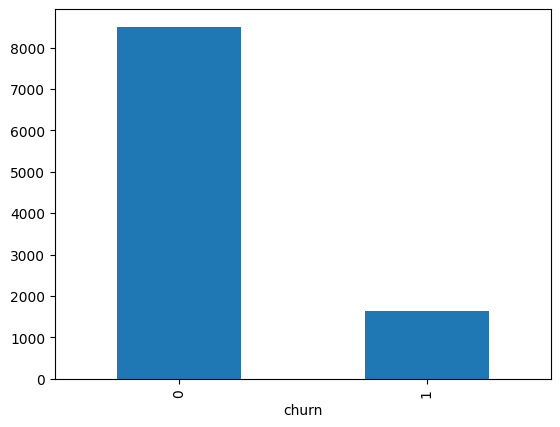

In [ ]:
# check target class distribution
df['churn'].value_counts().plot(kind = 'bar')

In [ ]:
df['churn'].value_counts()

,count
churn,
0,8500
1,1627


Dari kolom churn (variabel target) diperoleh jumlah nasabah yang tidak churn jauh lebih banyak dibanding jumlah nasabah yang churn. Hal ini menunjukkan adanya ketidakseimbangan (imbalance)

## **Seperti apa distribusi usia para nasabah? Usia manakah yang cenderung memiliki kemungkinan churn terbesar?**

In [ ]:
# check customer age describe
df['customer_age'].describe()

,customer_age
count,10127.000000
mean,46.325960
std,8.016814
min,26.000000
25%,41.000000
50%,46.000000
75%,52.000000
max,73.000000


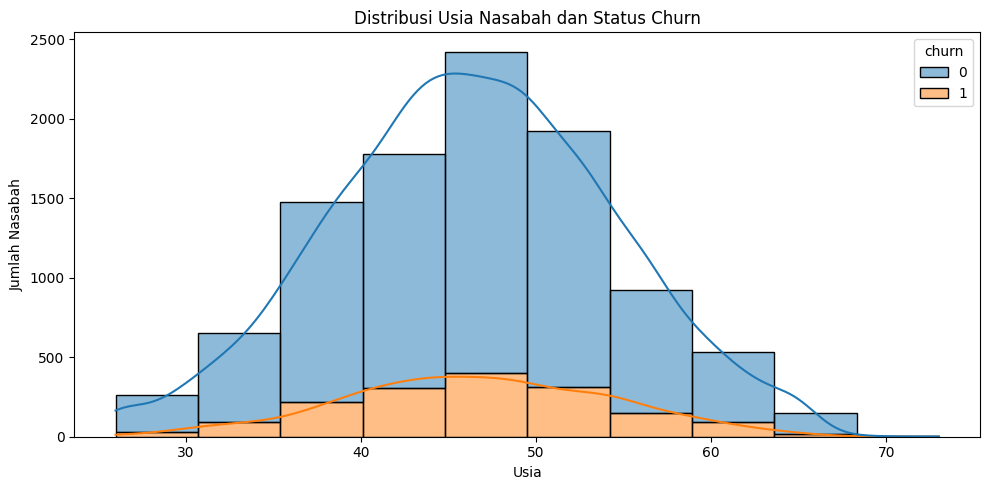

In [ ]:
#distribution of customer age and churn

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='customer_age', bins=10, kde=True, hue='churn', multiple='stack')
plt.title('Distribusi Usia Nasabah dan Status Churn')
plt.xlabel('Usia')
plt.ylabel('Jumlah Nasabah')
plt.tight_layout()
plt.show()

1. Distribusi Usia Nasabah
    

* Nasabah berada dalam rentang usia 26 - 73 tahun
* Jumlah nasabah tertinggi berada pada rentang usia 45-50 tahun
* Jumlah nasabah cenderung menurun setelah usia 50 tahun

2. Kecenderungan Churn berdasarkan usia

* Warna oranye menunjukkan nasabah yang churn (churn = 1).
* Jumlah churn tertinggi juga berada pada rentang usia 45–50 tahun, sejalan dengan konsentrasi jumlah nasabah.
* Setelah usia 50 tahun, baik total nasabah maupun nasabah churn mengalami penurunan.






## **Apakah terdapat korelasi antara tingkat pendidikan dan income category? Bagaimana korelasi dari kedua prediktor tersebut terhadap churn?**


<Axes: xlabel='income_category', ylabel='education_level'>

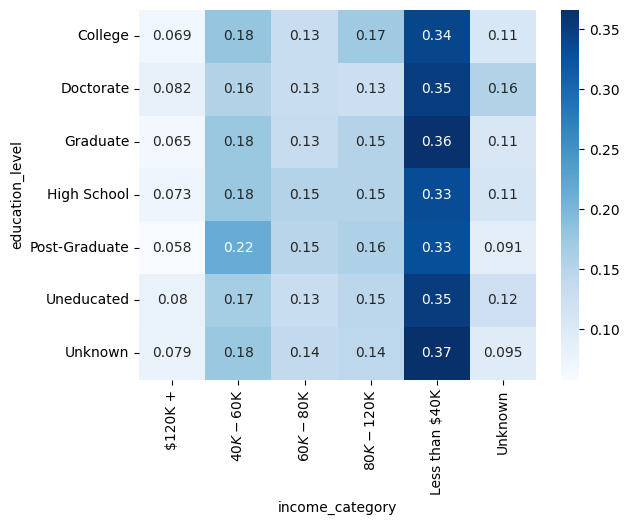

In [ ]:
#korelasi antara tingkat pendidikan dan income category

pd.crosstab(df['education_level'], df['income_category'], normalize='index')
sns.heatmap(pd.crosstab(df['education_level'], df['income_category'], normalize='index'), cmap='Blues', annot=True)


Berdasarkan heatmap antara education_level dan income_category, terlihat bahwa hampir semua kelompok pendidikan memiliki porsi dominan pada kategori Less than \$40K. Tidak ada pola korelasi yang sangat kuat antara tingkat pendidikan dan pendapatan, namun kelompok Unknown cenderung memiliki proporsi lebih tinggi di \$40K – 60K.

In [ ]:
#korelasi tingkat pendidikan dengan churn
pd.crosstab(df['education_level'], df['churn'], normalize='index')


churn,0,1
education_level,,
College,0.847976,0.152024
Doctorate,0.789357,0.210643
Graduate,0.844309,0.155691
High School,0.847988,0.152012
Post-Graduate,0.821705,0.178295
Uneducated,0.840619,0.159381
Unknown,0.831468,0.168532


Dari hasil crosstab, terlihat bahwa nasabah dengan tingkat pendidikan Doctorate memiliki proporsi churn paling tinggi.

In [ ]:
#korelasi kategori pendapatan dengan churn
pd.crosstab(df['income_category'], df['churn'], normalize='index')

churn,0,1
income_category,,
$120K +,0.826685,0.173315
$40K - $60K,0.848603,0.151397
$60K - $80K,0.865193,0.134807
$80K - $120K,0.842345,0.157655
Less than $40K,0.828138,0.171862
Unknown,0.831835,0.168165


Dari hasil crosstab, terlihat bahwa nasabah dengan pendapatan lebih dari \$120K memiliki proporsi churn paling tinggi.

## **Apakah terdapat perbedaan yang signifikan antara gender dengan kemungkinan nasabah untuk churn?**

Text(0.5, 1.0, 'Rata-rata Churn berdasarkan Gender')

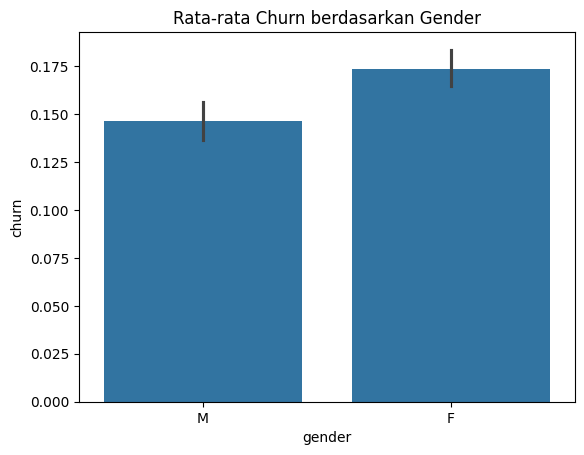

In [ ]:
sns.barplot(data=df, x='gender', y='churn')
plt.title("Rata-rata Churn berdasarkan Gender")


Berdasarkan rata-rata churn yang divisualisasikan berdasarkan gender, terlihat bahwa nasabah wanita memiliki tingkat churn sedikit lebih tinggi dibandingkan nasabah pria. Namun, perbedaannya tergolong kecil dan kemungkinan tidak signifikan secara statistik. Oleh karena itu, gender bukanlah prediktor utama churn dalam kasus ini.

## **Apakah semakin lama customer menjadi nasabah maka semakin kecil kemungkinan nasabah tersebut untuk churn?**


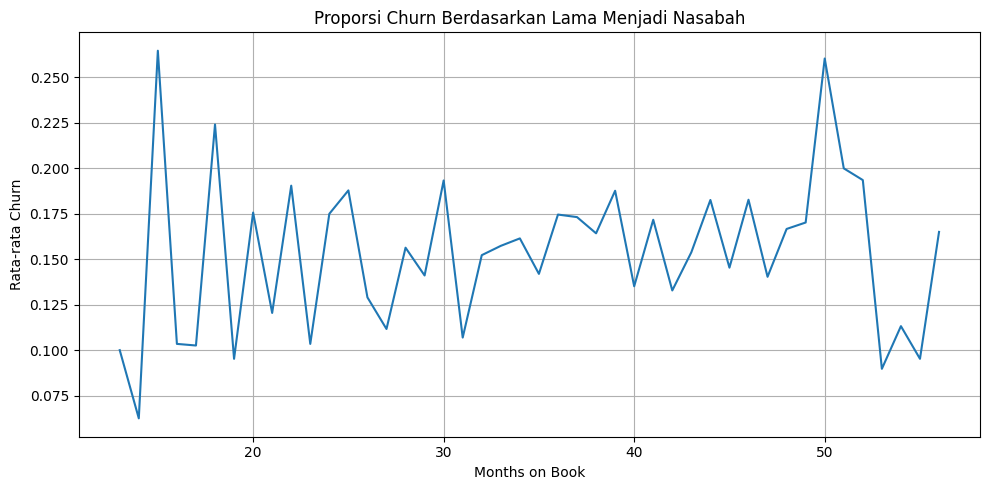

In [ ]:
tenure_churn = df.groupby('months_on_book')['churn'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=tenure_churn, x='months_on_book', y='churn')
plt.title('Proporsi Churn Berdasarkan Lama Menjadi Nasabah')
plt.xlabel('Months on Book')
plt.ylabel('Rata-rata Churn')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan analisis terhadap months_on_book dan tingkat churn, tidak ditemukan pola yang menunjukkan bahwa semakin lama seseorang menjadi nasabah maka semakin kecil kemungkinan mereka akan churn. Meskipun ada sedikit fluktuasi, tingkat churn cenderung tetap stabil sepanjang durasi keanggotaan. Hal ini mengindikasikan bahwa lama menjadi nasabah tidak secara langsung berkorelasi dengan loyalitas atau retensi.



## **Apakah semakin sering customer berinteraksi dengan bank dalam 1 tahun terakhir mempengaruhi besar atau kecilnya kemungkinan nasabah untuk churn?**

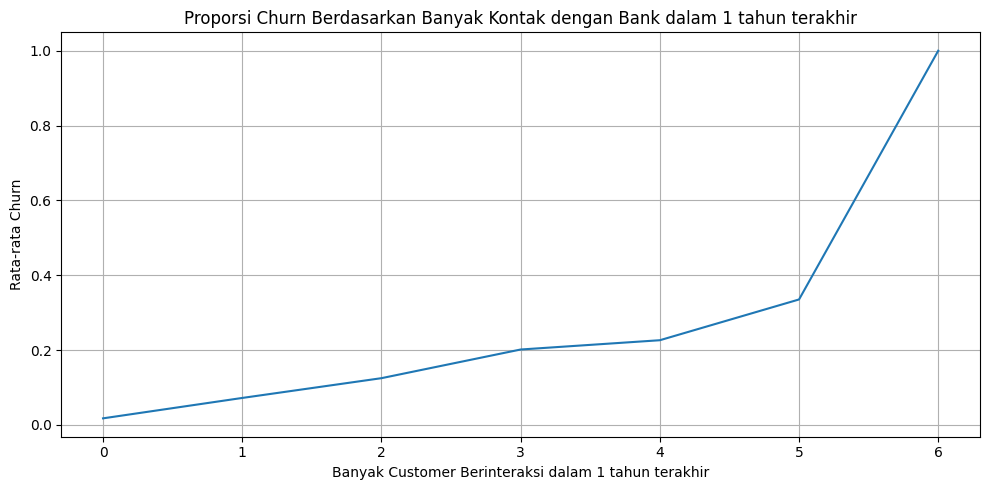

In [ ]:
contact = df.groupby('contacts_count_12_mon')['churn'].mean().reset_index()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=contact, x='contacts_count_12_mon', y='churn')
plt.title('Proporsi Churn Berdasarkan Banyak Kontak dengan Bank dalam 1 tahun terakhir')
plt.xlabel('Banyak Customer Berinteraksi dalam 1 tahun terakhir')
plt.ylabel('Rata-rata Churn')
plt.grid(True)
plt.tight_layout()
plt.show()

Berdasarkan analisis terhadap contacts_count_12_mon dan tingkat churn, menunjukkan bahwa semakin sering nasabah kontak dengan bank dalam 1 tahun terakhir maka semakin tinggi kemungkinan churn. Hal ini mengindikasikan kemungkinan adanya ketidakpuasan atau penanganan masalah berulang.

#Feature Engineering

Pada bagian ini, dilakukan pemrosesan dan transformasi data agar siap digunakan untuk pemodelan machine learning. Yaitu dengan melakukan Encoding variabel kategorikal seperti gender, education_level, dan income_category menjadi bentuk numerik.

In [ ]:
# kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [ ]:
#encode kolom kategorikal

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Train-Test Split

Pada bagian ini, dilakukan pembagian data menjadi data latih (train set) dan data uji (test set) dengan tujuan untuk memisahkan proses pelatihan model dan proses evaluasi model.

Proporsi data yang digunakan adalah 70% untuk pelatihan dan 30% untuk pengujian, serta menggunakan parameter stratify untuk menjaga proporsi distribusi kelas target (churn) tetap seimbang pada kedua subset data.

In [ ]:
# cretate predictor variables as X
X = df.drop(['churn'], axis = 1)
# create target data as y
y = df['churn']

In [ ]:
# split data to train and test data
# where 30% of churn_data are test data
# stratify data based on y varibales
# and freeze RNG with random_state = 1000
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=1000
)

In [ ]:

# check train data dimension
X_train.shape

(7088, 18)

In [ ]:
# check test data dimension
X_test.shape

(3039, 18)

In [ ]:
# check train target counts
y_train.value_counts()

,count
churn,
0,5949
1,1139


In [ ]:
# check test target counts
y_test.value_counts()

,count
churn,
0,2551
1,488


# Exploratory Data Analysis

In [ ]:
# create correlation matrix
X_train.corr().style.background_gradient(cmap='coolwarm')

,customer_age,gender,dependent_count,education_level,marital_status,income_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
customer_age,1.000000,-0.014538,-0.115456,0.006287,-0.004607,-0.019523,0.791861,-0.010324,0.052403,-0.011722,0.000913,-0.003371,0.001214,-0.075366,-0.048757,-0.065483,-0.017777,-0.004138
gender,-0.014538,1.000000,0.008201,-0.001701,0.011353,-0.535879,-0.004356,0.012389,-0.009745,0.053484,0.427408,0.026038,0.424803,0.022246,0.021569,-0.074554,-0.016111,-0.263778
dependent_count,-0.115456,0.008201,1.000000,0.005490,0.002847,-0.041826,-0.095756,-0.046537,-0.013235,-0.048514,0.059445,-0.002405,0.059622,-0.036348,0.035057,0.050633,0.011380,-0.035035
education_level,0.006287,-0.001701,0.005490,1.000000,0.010007,-0.002116,-0.000157,-0.005174,-0.013480,0.004038,0.006138,0.005752,0.005619,0.021425,0.021865,0.007854,0.012466,0.000114
marital_status,-0.004607,0.011353,0.002847,0.010007,1.000000,0.003457,-0.009410,-0.032519,0.009264,0.005547,0.037460,-0.026592,0.039816,-0.038554,0.053376,0.081608,-0.002755,-0.032744
income_category,-0.019523,-0.535879,-0.041826,-0.002116,0.003457,1.000000,-0.018793,0.013386,0.029670,-0.028668,-0.232617,-0.020357,-0.230645,0.002293,-0.012017,0.044632,0.024985,0.130254
months_on_book,0.791861,-0.004356,-0.095756,-0.000157,-0.009410,-0.018793,1.000000,-0.011106,0.074326,-0.004735,0.007370,-0.005090,0.007821,-0.060688,-0.037335,-0.048774,-0.010523,-0.015600
total_relationship_count,-0.010324,0.012389,-0.046537,-0.005174,-0.032519,0.013386,-0.011106,1.000000,-0.003474,0.057983,-0.068426,0.006696,-0.068981,0.052814,-0.345086,-0.244655,0.052580,0.050976
months_inactive_12_mon,0.052403,-0.009745,-0.013235,-0.013480,0.009264,0.029670,0.074326,-0.003474,1.000000,0.033774,-0.028789,-0.039451,-0.025240,-0.025730,-0.042106,-0.049208,-0.036844,-0.003693
contacts_count_12_mon,-0.011722,0.053484,-0.048514,0.004038,0.005547,-0.028668,-0.004735,0.057983,0.033774,1.000000,0.037036,-0.050143,0.041500,-0.028045,-0.109089,-0.152561,-0.091705,-0.061664


Berdasarkan hasil correlation matrix, ditemukan beberapa kolom yang multikolonieritas, diantaranya 'months_on_book', 'avg_open_to_buy', 'total_trans_ct', 'avg_utilization_ratio' . Dan untuk selanjutnya, kolom tersebut akan di drop.

In [ ]:
# drop certain column on train data
column_to_drop = ['months_on_book', 'avg_open_to_buy', 'total_trans_ct', 'avg_utilization_ratio']
X_train = X_train.drop(column_to_drop, axis = 1)

# drop certain column in test data
X_test = X_test.drop(column_to_drop, axis = 1)

In [ ]:
# pull numerical column
var_name = X_train.select_dtypes(include = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns

In [ ]:
var_name

Index(['customer_age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'income_category', 'total_relationship_count',
       'months_inactive_12_mon', 'contacts_count_12_mon', 'credit_limit',
       'total_revolving_bal', 'total_amt_chng_q4_q1', 'total_trans_amt',
       'total_ct_chng_q4_q1'],
      dtype='object')

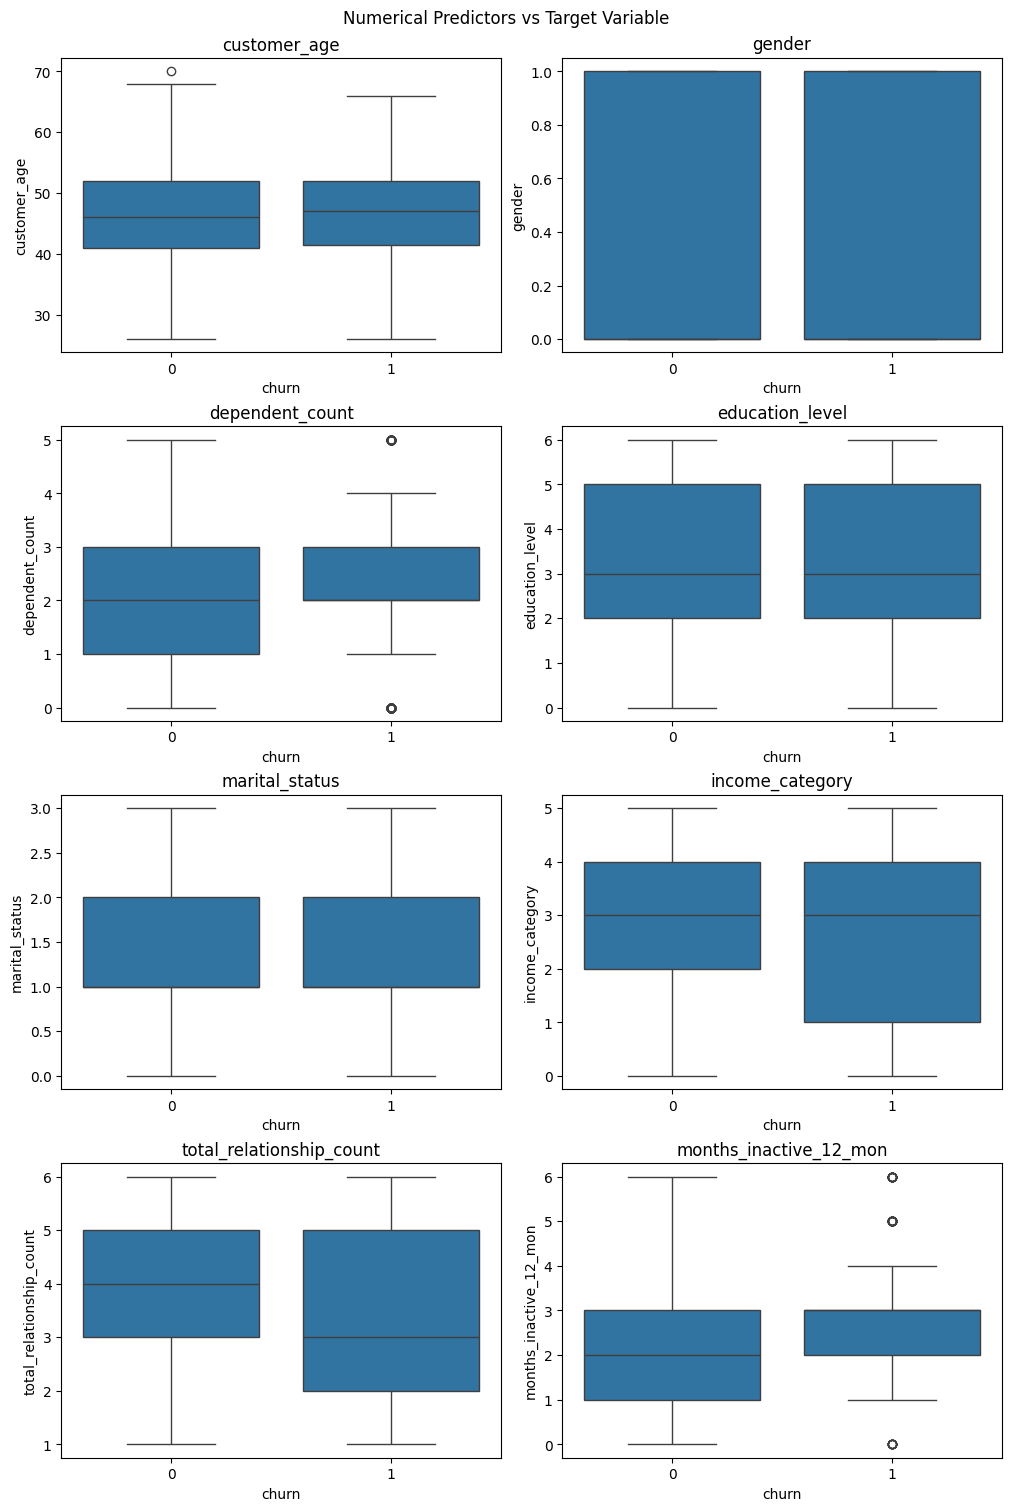

In [ ]:
# # create subplot 4 x 2
fig, axes = plt.subplots(4,2, sharex=False, sharey = False, figsize=(10,15), constrained_layout = True)

fig.suptitle('Numerical Predictors vs Target Variable')

col_index = 0

for row in range(4):
  for col in range(2):
    sns.boxplot(ax = axes[row,col], x=y_train, y = X_train[var_name[col_index]])
    axes[row,col].set_title(var_name[col_index])
    # axes[row,col].xticks(color='w')
    col_index += 1

1. customer_age vs churn

Distribusi usia pelanggan yang churn (1) dan tidak churn (0) relatif mirip, dengan median sedikit lebih rendah pada pelanggan yang churn.

2. gender vs churn

Plot batang menunjukkan proporsi gender hampir sama untuk keduanya.

3. dependent_count vs churn

Median jumlah tanggungan sedikit lebih tinggi pada pelanggan yang churn.

4. education_level vs churn

Tingkat pendidikan hampir seragam untuk kedua kelompok churn.

5. marital_status vs churn

Distribusi status pernikahan serupa antara dua kelompok.

6. income_category vs churn

Pola distribusi kategori pendapatan hampir identik.

7. total_relationship_count vs churn

Pelanggan yang tidak churn memiliki hubungan lebih banyak secara umum (median lebih tinggi).

8. months_inactive_12_mon vs churn

Pelanggan yang churn memiliki jumlah bulan tidak aktif yang lebih tinggi (median dan sebaran lebih tinggi).

# Modeling

Pada bagian ini, dilakukan pembangunan model prediksi churn menggunakan beberapa algoritma machine learning. Tujuannya adalah untuk membandingkan performa berbagai model dan memilih model terbaik yang tidak hanya akurat, tetapi juga mampu memberikan insight yang dapat ditindaklanjuti oleh tim bisnis.

Beberapa model yang diuji antara lain:

* Logistic Regression: Dipilih karena sifatnya yang interpretable dan cocok untuk baseline model.

* Random Forest: Model ensambel berbasis pohon keputusan yang kuat terhadap overfitting.

* Multilayer Perceptron (MLP): Neural network sederhana untuk melihat performa deep learning.

* XGBoost: Model gradient boosting yang terkenal dengan performa tinggi pada data tabular.

In [ ]:
from sklearn.linear_model import LogisticRegression
#define logistic regression model
logreg_clf = LogisticRegression(
    random_state = 1000
)

#fit model to training data
logreg_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1000)

**Random Forest Model**


In [ ]:
# define random forest model
random_forest_clf = RandomForestClassifier(
    random_state = 1000,
    n_estimators=100
)
# fit model to training data
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=1000)

**Multi-Layered Perceptron**
```python
sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
```
For further explanation, check: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
mlp_clf = MLPClassifier(
    random_state = 1000,
    hidden_layer_sizes = (8,),
    solver = 'sgd'
)

# fit model to training data
mlp_clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8,), random_state=1000, solver='sgd')

**XGBoost Classifier**
```python
xgboost.XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
```
For further explanation, check: https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [ ]:
# fit model no training data
xgb_clf = XGBClassifier(
    random_state = 1000
)

xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1000, ...)

# Model Evaluation

Pada bagian ini, dilakukan evaluasi terhadap performa model menggunakan metrik yang relevan dengan konteks bisnis. Dalam kasus prediksi churn, tujuan utama bukan hanya untuk memperoleh akurasi keseluruhan yang tinggi, tetapi mengidentifikasi nasabah yang benar-benar akan churn (kelas 1) secara efektif.

Oleh karena itu, metrik evaluasi yang digunakan tidak hanya accuracy, tetapi juga:

* Precision (kelas 1): Seberapa tepat model dalam memprediksi churn — penting untuk menghindari terlalu banyak false positives (misalnya mengintervensi pelanggan yang sebenarnya tidak akan churn).

* Recall (kelas 1): Seberapa banyak churn yang benar-benar berhasil dideteksi — ini sangat krusial karena kita ingin menghindari kehilangan nasabah yang sebenarnya ingin pergi.

* F1-score (kelas 1): Rata-rata harmonik dari precision dan recall, yang menjadi indikator seimbang dan cocok untuk kasus imbalanced data seperti churn prediction.

Selain itu, digunakan juga:
* Confussion matrix: Untuk melihat performa model dalam bentuk jumlah prediksi benar dan salah untuk masing - masing kelas.
* ROC Curve dan AUC (Area Under the Curve): Untuk mengevaluasi kemampuan model dalam membedakan antara churn dan tidak churn di berbagai ambang batas (threshold).

In [ ]:
#logreg prediction
logreg_pred = logreg_clf.predict(X_test)
logreg_pred_proba = logreg_clf.predict_proba(X_test)

# random forest prediction
rf_pred = random_forest_clf.predict(X_test)
rf_pred_proba = random_forest_clf.predict_proba(X_test)

# multi-layered perceptron prediction
mlp_pred = mlp_clf.predict(X_test)
mlp_pred_proba = mlp_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

## **Classification Report**

In [ ]:
# logistic regression prediction result
pd.DataFrame(metrics.classification_report(y_test, logreg_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.887860,0.752174,0.877591,0.820017,0.866072
recall,0.977656,0.354508,0.877591,0.666082,0.877591
f1-score,0.930597,0.481894,0.877591,0.706246,0.858545
support,2551.000000,488.000000,0.877591,3039.000000,3039.000000


In [ ]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.944841,0.911765,0.94077,0.928303,0.939529
recall,0.987064,0.698770,0.94077,0.842917,0.940770
f1-score,0.965491,0.791183,0.94077,0.878337,0.937501
support,2551.000000,488.000000,0.94077,3039.000000,3039.000000


In [ ]:
# multi-layered perceptron prediction result
pd.DataFrame(metrics.classification_report(y_test, mlp_pred, target_names=['0','1'], output_dict=True))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,0,1,accuracy,macro avg,weighted avg
precision,0.839421,0.0,0.839421,0.419710,0.704627
recall,1.000000,0.0,0.839421,0.500000,0.839421
f1-score,0.912701,0.0,0.839421,0.456351,0.766140
support,2551.000000,488.0,0.839421,3039.000000,3039.000000


In [ ]:
# XGBoost prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.972320,0.879747,0.957881,0.926033,0.957454
recall,0.977656,0.854508,0.957881,0.916082,0.957881
f1-score,0.974980,0.866944,0.957881,0.920962,0.957632
support,2551.000000,488.000000,0.957881,3039.000000,3039.000000


Berdasarkan hasil classification report dari keempat model yang diuji, model XGBoost menunjukkan performa terbaik dengan F1-score sebesar 86.7% pada kelas churn. Hal ini menunjukkan bahwa model mampu menyeimbangkan antara presisi dan recall secara optimal, sehingga sangat efektif dalam mengidentifikasi pelanggan yang berisiko churn.

## **Confusion Matrix**

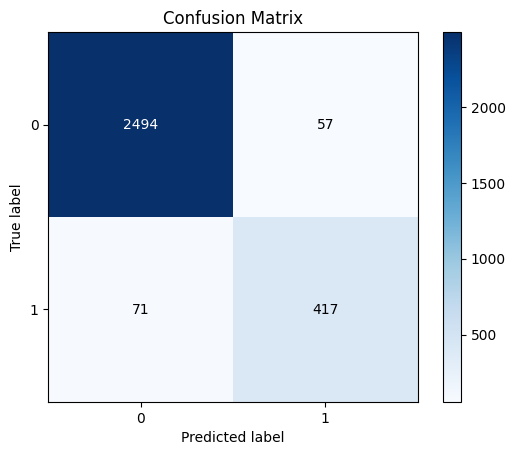

In [ ]:
# xgboost result
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred);

Insight:

* Model berhasil mengenali 417 pelanggan yang benar-benar churn.

* Tanpa model (misalnya semua prediksi = tidak churn), nilai TP = 0, sehingga recall = 0.

* Ini membuktikan model jauh lebih baik daripada tidak menggunakan model sama sekali.

## **ROC-AUC**

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:95: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


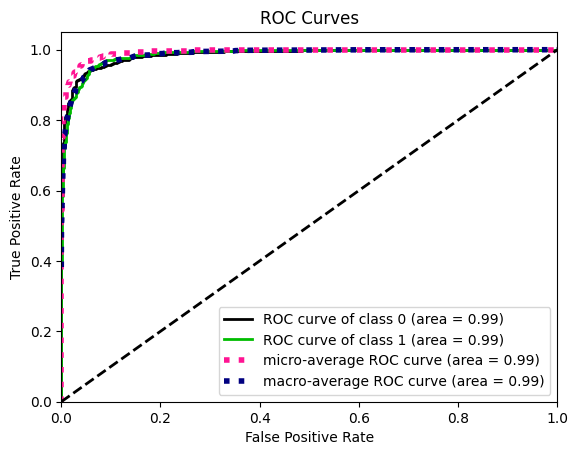

In [ ]:
# xgboost result
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

Insight :
* ROC Curve sangat baik — mendekati pojok kiri atas.

* AUC = 0.99, menunjukkan performa luar biasa dalam membedakan pelanggan churn vs tidak churn.

* Garis diagonal = baseline (tebakan acak, AUC = 0.5). Model XGBoost jauh di atas baseline.

# Model Agnostic Methods

In [ ]:
## initiate explainer for XGBoost model
churn_xgb_exp = dx.Explainer(xgb_clf, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 7088 rows 14 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 7088 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x7b3cc6da4360> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 5.46e-07, mean = 0.161, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.514, mean = -1.85e-05, max = 0.37
  -> model_info        : package xgboost

A new explainer has been created!


## Feature Importance

In [ ]:
# visualize permutation feature importance for XGBoost model
churn_xgb_exp.model_parts().plot()

Insight :
* total_trans_amt (jumlah total transaksi) adalah fitur paling penting.
* Disusul oleh perubahan nilai dan frekuensi transaksi antar kuartal (total_amt_chng_q4_q1, total_ct_chng_q4_q1).
* Fitur lainnya seperti total_revolving_bal dan total_relationship_count juga memiliki pengaruh signifikan.

Interpretasi:
* Nasabah aktif secara finansial (frekuensi & nilai transaksi tinggi) cenderung tidak churn.
* Penurunan drastis transaksi adalah sinyal awal churn.
* Pelanggan dengan keterlibatan produk lebih banyak cenderung lebih loyal.

## Partial Dependence Plot

In [ ]:
# Buat PDP untuk masing-masing fitur penting
churn_xgb_exp.model_profile(variables=['total_trans_amt']).plot()
churn_xgb_exp.model_profile(variables=['total_amt_chng_q4_q1']).plot()
churn_xgb_exp.model_profile(variables=['total_ct_chng_q4_q1']).plot()
churn_xgb_exp.model_profile(variables=['total_revolving_bal']).plot()
churn_xgb_exp.model_profile(variables=['total_relationship_count']).plot()


Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  510.     689.74   869.48 ... 18124.52 18304.26 18484.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  7.88it/s]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00, 10.26it/s]


Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s]


Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[   0.     25.17   50.34 ... 2466.66 2491.83 2517.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  6.91it/s]


Calculating ceteris paribus:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.   1.05 1.1  ... 5.9  5.95 6.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus: 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]


a. total_trans_amt:
Semakin tinggi total transaksi, semakin rendah kemungkinan churn.

Titik kritis: pelanggan dengan transaksi rendah harus menjadi target prioritas retensi.

b. total_amt_chng_q4_q1 dan total_ct_chng_q4_q1:
Penurunan aktivitas kuartalan meningkatkan kemungkinan churn secara signifikan.

Dapat digunakan sebagai sinyal deteksi dini churn.

c. total_relationship_count:
Pelanggan multi-produk lebih loyal.

Memberikan arah strategis untuk promosi cross-sell/upsell.

d. total_revolving_bal:
Pelanggan dengan utang tinggi memiliki risiko churn lebih tinggi.

Kombinasi risiko keuangan dan churn perlu dikelola bersama.



# Rekomendasi Strategis untuk Stakeholder

1. Deteksi Dini Pelanggan Berisiko
Implementasikan sistem monitoring berbasis:

Penurunan jumlah & nilai transaksi antar kuartal.

Nasabah dengan transaksi bulanan < threshold tertentu.

Sistem ini dapat mengirimkan alert otomatis ke tim marketing/retensi.

2. Program Aktivasi Pelanggan Pasif
Target pelanggan dengan total_trans_amt rendah atau months_inactive_12_mon tinggi dengan campaign aktivasi:

Cashback, kupon, atau reminder personal.

Edukasi produk (misalnya penggunaan kartu kredit secara optimal).

3. Tingkatkan Keterikatan Melalui Cross-Selling
Fokus pada pelanggan dengan total_relationship_count < 2.

Berikan penawaran bundling, seperti kartu kredit + pinjaman ringan + tabungan berjangka.

4. Pendekatan Khusus untuk Pelanggan dengan Saldo Revolving Tinggi
Bangun program bantuan keuangan:

Konsultasi keuangan pribadi.

Keringanan bunga/cicilan untuk pelanggan yang loyal namun menurun aktivitasnya.

